In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("/content/output.csv")

In [4]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Class_label'])
df['Class_label'] = label_encoder.transform(df['Class_label'])
df

,Num_Count_Private,Alpha_Count_Private,Num_Count_Public,Alpha_Count_Public,Private_Key_length,Public_Key_length,Class_label
0,37,27,90,40,64,130,0
1,46,18,85,45,64,130,0
2,38,26,78,52,64,130,0
3,44,20,77,53,64,130,0
4,42,22,94,36,64,130,0
...,...,...,...,...,...,...,...
3995,44,20,77,51,64,128,3
3996,39,25,80,48,64,128,3
3997,37,27,85,43,64,128,3
3998,46,18,91,37,64,128,3


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3200, 6)
X_test shape: (800, 6)
y_train shape: (3200,)
y_test shape: (800,)


In [8]:
classifier = SVC(kernel="rbf" , gamma="auto" , C=10)

In [9]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [12]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       212
           1       0.49      0.53      0.51       192
           2       0.98      1.00      0.99       202
           3       0.49      0.45      0.47       194

    accuracy                           0.75       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.75      0.75      0.75       800



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# k-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

labels = list()
accuracies = list()
# Evaluate and display results
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    labels.append(model_name)
    accuracies.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, predictions))

In [26]:
evaluate_model(dt_predictions, "Decision Tree")

Decision Tree Accuracy: 0.75
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       0.53      0.54      0.54       213
           2       1.00      1.00      1.00       194
           3       0.46      0.45      0.46       184

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [27]:
evaluate_model(rf_predictions, "Random Forest")

Random Forest Accuracy: 0.74
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       0.51      0.47      0.49       213
           2       1.00      1.00      1.00       194
           3       0.43      0.47      0.45       184

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [28]:
evaluate_model(knn_predictions, "k-Nearest Neighbors")

k-Nearest Neighbors Accuracy: 0.73
k-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       209
           1       0.51      0.48      0.50       213
           2       0.99      0.97      0.98       194
           3       0.44      0.47      0.46       184

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



In [30]:
labels.append("SVM")
accuracies.append(accuracy)

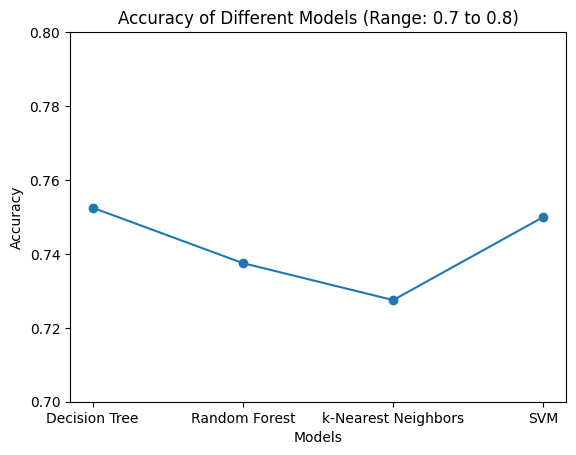

In [31]:
#Model Comparison
import matplotlib.pyplot as plt

# Plotting the line graph
plt.plot(labels, accuracies, marker='o', linestyle='-')

# Setting the y-axis range to 0.7 to 0.8
plt.ylim(0.7, 0.8)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models (Range: 0.7 to 0.8)')

# Display the plot
plt.show()

In [17]:
def count_numbers(s):
    num_count = sum(c.isdigit() for c in s)
    return num_count

def count_alpha(s):
    alpha_count = sum(c.isalpha() for c in s)
    return alpha_count

private_key = '049a3408bd84f7e01e734a3faefabb83e3ac75df754d69b89aad6cacf8cbcc16'
public_key = '20eb035fdf96f3de0892820b7702c4218d8077c6adad3ec501ba544a41a091e328fd0725bd25c5a8944df9d55a230e2351c2bb1490fb28564e387ff91612e021'
data=list()
data.append(count_numbers(private_key))
data.append(count_alpha(private_key))
data.append(count_numbers(public_key))
data.append(count_alpha(public_key))
data.append(len(private_key))
data.append(len(public_key))
data


[32, 32, 85, 43, 64, 128]

In [18]:
classifier.predict([data])

array([3])

In [32]:
file_path = '/content/test_dataset.csv'
test_df = pd.read_csv(file_path, usecols=['Private Key', 'Public Key'])

In [33]:
test_df

,Private Key,Public Key
0,1550da6ea8092667a94270d65d119728276e5e8ad91c57...,047cdb9b3fd8c1ddf4beee9904fa140058739b57e7be26...
1,0271269a3927dd4caaec53c91cb828d9627a7b8b8efca4...,04b2ca16f239d53dd48243e9e1567e761c11f2fd9e4664...
2,3d3027995c6212b759a07515a339efe5ec0ef81706be3b...,0486dc2c13ab42955ae2d89c0626a9407152749c183095...
3,c204533730d9a16f066a64a26a350785bd06f8530cb014...,04fdd852cec74e2f8241d3173b7ac1ce465f50463cc894...
4,021bffd9fb3b510acc7fd8c2532250a2ce62dca211b69d...,04a29ad37b8031d903d0f829cac906760bf6075f9dbfec...
5,879e1a438cc3de30d3b815aea47ce4427d7d6ba1bcdcf4...,045dac43390f97080ee8733b8abf9329740f13d6daefc0...
6,4279225b11c3fdc4474b1ff4f9ca0e62d061e0e678c92f...,04b0eb764e789ee4c8fe8ad6e33457ab1be5aab19960f9...
7,925f331b96d0418d372b417bd4bcbeaa347b9876a1f9ca...,04831cb289ae28fdde67e32cd72ad1f28abaa77369c38a...
8,e70b54ded72b87f10a83fae8b85a413bb4345887b9b744...,044d778be0a946debf893217bcc2b223be0491bdc41ef0...
9,66065018f895cd859f882c0be212becfdaeead19a8b3ee...,04aff15c51b19099840331ff2120d3dd65e2f04c9ec81b...


No charts were generated by quickchart


In [34]:
test_data = list()
datas = list()
for index, row in test_df.iterrows():
    datas.append(count_numbers(row['Private Key']))
    datas.append(count_alpha(row['Private Key']))
    datas.append(count_numbers(row['Public Key']))
    datas.append(count_alpha(row['Public Key']))
    datas.append(len(row['Private Key']))
    datas.append(len(row['Public Key']))
    test_data.append(datas)
    datas=[]


In [35]:
test_data[0]

[44, 20, 73, 57, 64, 130]

In [47]:
import pickle
pickle_in = open("classifier.pkl","rb")
classifier = pickle.load(pickle_in)

In [37]:
results = list()
for i in test_data:
  results.append(classifier.predict([i]))

In [38]:
results

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([3]),
 array([1]),
 array([3]),
 array([3]),
 array([3]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([3]),
 array([3]),
 array([1]),
 array([1]),
 array([3]),
 array([1]),
 array([3]),
 array([3]),
 array([3]),
 array([1])]

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
      }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.750937,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.760625,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.751563,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.73875

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.72625

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.74

In [46]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()